In [4]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import sys
import os

sys.path.append(os.path.abspath('../customNN'))
from model import Classifier

In [1]:

IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

MODEL_STATE_DICT_KEY = "model_state_dict"
CLASSES_KEY = "class_names"


NameError: name 'torch' is not defined

In [3]:
model = Classifier().to(device=DEVICE)
checkpoint = torch.load("models/model_with_classes.pth", weights_only=True)
model.load_state_dict(checkpoint[MODEL_STATE_DICT_KEY])
classes_names = checkpoint[CLASSES_KEY]

In [4]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

### Load example from mnist

In [5]:
from torchvision import datasets
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

In [6]:
image, label = mnist_dataset[0]  # Wybieramy pierwszy obraz i etykietę


In [7]:
orginal_image = image.numpy().squeeze()  # Usunięcie wymiaru kanału

In [8]:
image_tensor = torch.from_numpy(orginal_image).unsqueeze(0)

In [9]:
model.eval()

with torch.no_grad():
    pred = model(image_tensor.unsqueeze(0).to(DEVICE))
    pred_probs = torch.softmax(pred, dim=1)
    pred_label = torch.argmax(pred_probs, dim=1)
    class_name = classes_names[pred_label.cpu()]

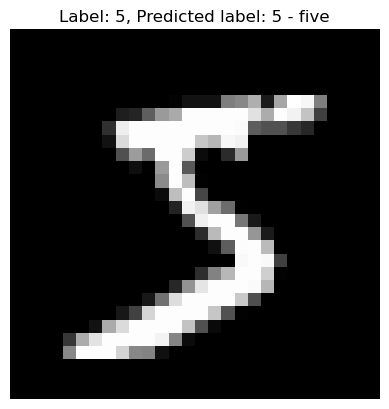

In [10]:

plt.imshow(orginal_image, cmap='gray')
plt.title(f'Label: {label}, Predicted label: {class_name}')
plt.axis('off')  # Ukrycie osi
plt.show()